## Titanic EDA and Survival Prediction

In [1]:
# import necessary libraries

# regular expression
import re

# for handling datasets 
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for train test split
from sklearn.model_selection import train_test_split

# for scaling
from sklearn.preprocessing import StandardScaler

# for linear regression
from sklearn.linear_model import LogisticRegression

# for model evaluation
from sklearn.metrics import accuracy_score, plot_confusion_matrix, roc_auc_score

# for model persistance and for the scaler
import joblib

In [2]:
# load the data

df = pd.read_csv("https://www.openml.org/data/get_csv/16826755/phpMYEkMl")

# display data
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


In [3]:
# replace ? with NaN values
df = df.replace('?', np.nan)

In [5]:
df['cabin'].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F4                 4
F33                4
                  ..
C132               1
E60                1
B52 B54 B56        1
C49                1
F38                1
Name: cabin, Length: 186, dtype: int64

In [4]:
# retain only the first cabin if more than 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan    

In [5]:
# apply in the cabin feature
df['cabin'] = df['cabin'].apply(get_first_cabin)

In [6]:
# check data
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [9]:
df.name

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: name, Length: 1309, dtype: object

In [7]:
# we will need to extract the title from the name column
def extract_title(name):
    line = name
    if re.search('Miss', line):
        return 'Miss'
    elif re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'

In [8]:
#extract_title('Allison, Mrs. Hudson J C (Bessie Waldo Daniels)')

'Mrs'

In [9]:
df['title'] = df['name'].apply(extract_title)

In [10]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22,S,NaN,135,"Montreal, PQ / Chesterville, ON",Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs


In [11]:
# there are two numerical features fare and age but the type of these features are defined as object
# so need to convert these to floats

print(type(df['age'][0]))
print(type(df['fare'][0]))

<class 'str'>
<class 'str'>


In [12]:
df['age'] = df['age'].astype(float)
df['fare'] = df['fare'].astype(float)

In [13]:
# there are few columns that will not be useful in our prediction
# name, body, boat, home.dest, and ticket
# lets remove these features

columns_to_remove = ['name','ticket','boat','body','home.dest']

df.drop(columns_to_remove, axis = 1, inplace = True)

In [15]:
df.head(5)

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [16]:
# saving the clean dataset
df.to_csv('titanic.csv', index= False)

## Configuration

In [17]:
target = 'survived'

In [18]:
# list of variables to be used in the pipeline's transformers

num_vars = [var for var in df.columns if (df[var].dtypes != 'O') and (var != target)]

cat_vars = [var for var in df.columns if df[var].dtypes == 'O']

In [19]:
print(num_vars)
print(cat_vars)

['pclass', 'age', 'sibsp', 'parch', 'fare']
['sex', 'cabin', 'embarked', 'title']


### Find missing values in variables

In [96]:
df[num_vars].isnull().sum()

pclass      0
age       263
sibsp       0
parch       0
fare        1
dtype: int64

In [97]:
# lets find missing values in variables
df[cat_vars].isnull().sum()

sex            0
cabin       1014
embarked       2
title          0
dtype: int64

### Determine cardinality of the categorical variables

In [84]:
df[cat_vars].nunique()

sex           2
cabin       181
embarked      3
title         4
dtype: int64

### Determine Distribution of the numerical variable

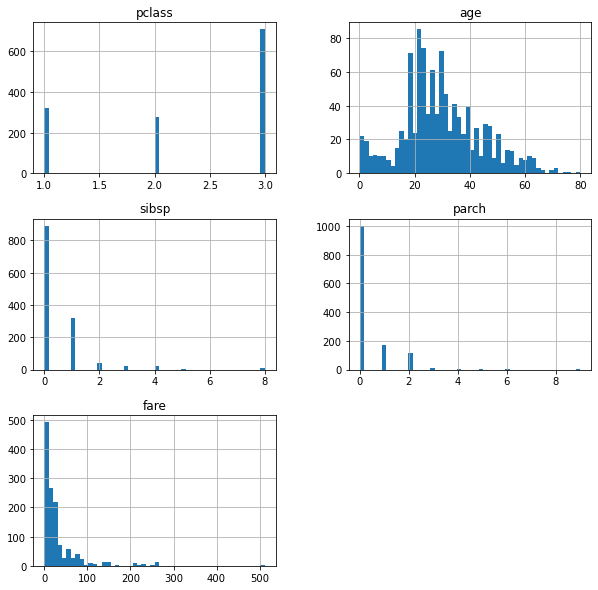

In [98]:
df[num_vars].hist(bins = 50, figsize = (10,10))
plt.show();

### Separate DATA into train and test

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(target, axis = 1), 
                                                    df[target], test_size = 0.2, random_state=0)

In [21]:
X_train.shape, X_test.shape

((1047, 9), (262, 9))

## Feature Engineering

### Extract only the letter (and drop the number) from the variable Cabin

In [102]:
df['cabin'].value_counts()

F       8
C23     6
G6      5
B57     5
C78     4
       ..
B102    1
B39     1
D40     1
D34     1
F38     1
Name: cabin, Length: 181, dtype: int64

In [22]:
X_train['cabin'] = X_train['cabin'].str[0]
X_test['cabin'] = X_test['cabin'].str[0]

In [23]:
X_train['cabin'].unique()

array([nan, 'E', 'F', 'A', 'C', 'D', 'B', 'T', 'G'], dtype=object)

### Fill in Missing Data in Numerical Variable
- Add a binary missing indicator
- Fill NA in original variable with the median

In [138]:
df[num_vars].isnull().sum()

pclass      0
age       263
sibsp       0
parch       0
fare        1
dtype: int64

In [24]:
for var in ['age', 'fare']:
    
    X_train[var+'_NA'] = np.where(X_train[var].isnull(), 1, 0)
    X_test[var+'_NA'] = np.where(X_test[var].isnull(), 1, 0)
      
    median_value = X_train[var].median()
    X_train[var].fillna(median_value, inplace = True)
    X_test[var].fillna(median_value, inplace = True)

In [156]:
X_train[num_vars].isnull().sum()

pclass    0
age       0
sibsp     0
parch     0
fare      0
dtype: int64

In [25]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title,age_NA,fare_NA
1118,3,male,25.0,0,0,7.9250,NaN,S,Mr,0,0
44,1,female,41.0,0,0,134.5000,E,C,Miss,0,0
1072,3,male,28.0,0,0,7.7333,NaN,Q,Mr,1,0
1130,3,female,18.0,0,0,7.7750,NaN,S,Miss,0,0
574,2,male,29.0,1,0,21.0000,NaN,S,Mr,0,0


### Replace missing data in the categorical features with the string 'missing'

In [26]:
X_train[cat_vars] = X_train[cat_vars].fillna('Missing')
X_test[cat_vars] = X_test[cat_vars].fillna('Missing')

In [27]:
X_train[cat_vars].isnull().sum()

sex         0
cabin       0
embarked    0
title       0
dtype: int64

In [28]:
X_train.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
cabin       0
embarked    0
title       0
age_NA      0
fare_NA     0
dtype: int64

In [29]:
X_test.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
cabin       0
embarked    0
title       0
age_NA      0
fare_NA     0
dtype: int64

### Remove rare labels in Categorical variables
- Remove labels present in less than 5% of all the passengers

In [167]:
X_test['cabin'].value_counts()

Missing    211
C           16
B           13
D           10
E            5
A            3
F            3
G            1
Name: cabin, dtype: int64

In [176]:
'''
all_values = test.unique()
length = len(test)

for val in all_values:
    percentage = (all_val_counts[val] / length) * 100
    #print(percentage)
    if percentage < 5:
        print(val)
'''

G
E
B
A
F
D


In [190]:
#test_X_train = X_train.copy()

In [191]:
#test_X_train.groupby('cabin')['cabin'].count()

cabin
A           19
B           52
C           78
D           36
E           36
F           18
G            4
Missing    803
T            1
Name: cabin, dtype: int64

In [193]:
#temp = test_X_train.groupby('cabin')['cabin'].count()/len(test_X_train)
#temp

cabin
A          0.018147
B          0.049666
C          0.074499
D          0.034384
E          0.034384
F          0.017192
G          0.003820
Missing    0.766953
T          0.000955
Name: cabin, dtype: float64

In [196]:
#temp[temp > 0.05]

cabin
C          0.074499
Missing    0.766953
Name: cabin, dtype: float64

In [30]:
def find_frequent_labels(df, var, rare_perc):
    
    # function finds the labels that are shared by more than
    # a certain % of the passengers in the dataset
    
    df = df.copy()
    
    tmp = df.groupby(var)[var].count() / len(df)
    
    return tmp[tmp > rare_perc].index


In [31]:
for var in cat_vars:
    
    # find the frequent categories
    frequent_ls = find_frequent_labels(X_train, var, 0.05)
    
    # replace rare categories by the string "Rare"
    X_train[var] = np.where(X_train[var].isin(
        frequent_ls), X_train[var], 'Rare')
    
    X_test[var] = np.where(X_test[var].isin(
        frequent_ls), X_test[var], 'Rare')

In [32]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title,age_NA,fare_NA
1118,3,male,25.0,0,0,7.9250,Missing,S,Mr,0,0
44,1,female,41.0,0,0,134.5000,Rare,C,Miss,0,0
1072,3,male,28.0,0,0,7.7333,Missing,Q,Mr,1,0
1130,3,female,18.0,0,0,7.7750,Missing,S,Miss,0,0
574,2,male,29.0,1,0,21.0000,Missing,S,Mr,0,0


In [200]:
X_train['cabin'].value_counts()

Missing    803
Rare       166
C           78
Name: cabin, dtype: int64

In [202]:
X_train[cat_vars].nunique()

sex         2
cabin       3
embarked    4
title       3
dtype: int64

In [203]:
X_test[cat_vars].nunique()

sex         2
cabin       3
embarked    3
title       3
dtype: int64

### Perform one-hot encoding of categorical variables in k-1 binary variables
- k-1 means, if we have 9 different values, then we create 8 different variables

In [37]:
X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

In [38]:
X_train.head()

,pclass,age,sibsp,parch,fare,age_NA,fare_NA,sex_male,cabin_Missing,cabin_Rare,embarked_Q,embarked_Rare,embarked_S,title_Mr,title_Mrs,title_Rare
1118,3,25.0,0,0,7.9250,0,0,1,1,0,0,0,1,1,0,0
44,1,41.0,0,0,134.5000,0,0,0,0,1,0,0,0,0,0,0
1072,3,28.0,0,0,7.7333,1,0,1,1,0,1,0,0,1,0,0
1130,3,18.0,0,0,7.7750,0,0,0,1,0,0,0,1,0,0,0
574,2,29.0,1,0,21.0000,0,0,1,1,0,0,0,1,1,0,0


In [39]:
X_test.head()

,pclass,age,sibsp,parch,fare,age_NA,fare_NA,sex_male,cabin_Missing,cabin_Rare,embarked_Q,embarked_S,title_Mr,title_Mrs,title_Rare
1139,3,38.0,0,0,7.8958,0,0,1,1,0,0,1,1,0,0
533,2,21.0,0,1,21.0000,0,0,0,1,0,0,1,0,0,0
459,2,42.0,1,0,27.0000,0,0,1,1,0,0,1,1,0,0
1150,3,28.0,0,0,14.5000,1,0,1,1,0,0,1,1,0,0
393,2,25.0,0,0,31.5000,0,0,1,1,0,0,1,1,0,0


In [43]:
# we can see there is no embarked_Rare column for X_test, so lets add this Column to X_test with the value 0
# this will allow consistency in the training and the test data sets
X_test['embarked_Rare'] = 0

In [44]:
X_test.head(3)

,pclass,age,sibsp,parch,fare,age_NA,fare_NA,sex_male,cabin_Missing,cabin_Rare,embarked_Q,embarked_S,title_Mr,title_Mrs,title_Rare,embarked_Rare
1139,3,38.0,0,0,7.8958,0,0,1,1,0,0,1,1,0,0,0
533,2,21.0,0,1,21.0000,0,0,0,1,0,0,1,0,0,0,0
459,2,42.0,1,0,27.0000,0,0,1,1,0,0,1,1,0,0,0


In [46]:
# Now embarked_Rare is at the end of the X_test
# so lets create a list the contains variables in the Training data

variables = [c for c in X_train.columns]

print(variables)

['pclass', 'age', 'sibsp', 'parch', 'fare', 'age_NA', 'fare_NA', 'sex_male', 'cabin_Missing', 'cabin_Rare', 'embarked_Q', 'embarked_Rare', 'embarked_S', 'title_Mr', 'title_Mrs', 'title_Rare']


### Scaling

In [47]:
scaler = StandardScaler()

In [48]:
# fit the scaler to the X_train set
scaler.fit(X_train[variables])

StandardScaler()

In [49]:
# transform the train and test set
X_train = scaler.transform(X_train[variables])
X_test = scaler.transform(X_test[variables])

### Training Logistic Regression Model
- will be using Regularization parameter to 0.0005 and random_state = 0

In [50]:
model = LogisticRegression(C = 0.0005, random_state=0)

In [51]:
# train the model
model.fit(X_train, y_train)

LogisticRegression(C=0.0005, random_state=0)

### Make Predictions and Evaluate Model's Performance
Determine
- accuracy
- roc_curve

- <b> To determine accuracy, we need to find the output 0, 1 referring to survived or not, but for roc_curve, we need to find the probability of survival</b>

In [60]:
pd.get_dummies(X, drop_first = True)

,pclass,age,sibsp,parch,fare,age_NA,fare_NA,sex_male,cabin_Missing,cabin_Rare,embarked_Q,embarked_Rare,embarked_S,title_Mr,title_Mrs,title_Rare
1118,3,25.0000,0,0,7.9250,0,0,1,1,0,0,0,1,1,0,0
44,1,41.0000,0,0,134.5000,0,0,0,0,1,0,0,0,0,0,0
1072,3,28.0000,0,0,7.7333,1,0,1,1,0,1,0,0,1,0,0
1130,3,18.0000,0,0,7.7750,0,0,0,1,0,0,0,1,0,0,0
574,2,29.0000,1,0,21.0000,0,0,1,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,3,0.1667,1,2,20.5750,0,0,0,1,0,0,0,1,0,0,0
835,3,28.0000,0,0,8.0500,1,0,1,1,0,0,0,1,1,0,0
1216,3,28.0000,0,0,7.7333,1,0,0,1,0,1,0,0,0,0,0
559,2,20.0000,0,0,36.7500,0,0,0,1,0,0,0,1,0,0,0


In [61]:
# make predictions for train set
preds_train = model.predict(X_train)
preds_proba_train = model.predict_proba(X_train)[:,1]

print('train-roc: {}'.format(roc_auc_score(y_train, preds_proba_train)))
print('train_accuracy: {}'.format(accuracy_score(y_train,preds_train)))

train-roc: 0.8434350850077279
train_accuracy: 0.7125119388729704


In [62]:
# make predictions for train set
preds_test = model.predict(X_test)
preds_proba_test = model.predict_proba(X_test)[:,1]

print('test-roc: {}'.format(roc_auc_score(y_test, preds_proba_test)))
print('test_accuracy: {}'.format(accuracy_score(y_test,preds_test)))

test-roc: 0.8353395061728395
test_accuracy: 0.7022900763358778
